In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("TrainingWiDS2021.csv")
test=pd.read_csv("UnlabeledWiDS2021.csv")

In [3]:
print(train.shape)
print(test.shape)

(130157, 181)
(10234, 180)


In [4]:
train.sample(5)

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
106056,106057,241167,59,46.0,37.914172,1,Caucasian,F,167.6,Recovery Room,...,NaN,NaN,0,0,0,0,0,0,0,0
60269,60270,259387,176,55.0,23.751090,0,Caucasian,M,185.4,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,1
47643,47644,267136,21,53.0,25.359773,0,Caucasian,F,152.4,Step-Down Unit (SDU),...,NaN,NaN,0,0,0,0,0,0,0,0
68720,68721,163517,37,54.0,17.939027,0,African American,F,157.5,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
94850,94851,270350,110,62.0,28.293345,1,Caucasian,M,188.0,Operating Room,...,208.333333,208.333333,0,0,0,0,0,0,0,0


In [5]:
test.sample(5)

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
6257,6258,143662,10174,18,20.9,0,Hispanic,M,162.6,Emergency Department,...,137.0,652.4,651.656,0,0,0,0,0,0,0
1152,1153,139195,10163,63,56.5,0,Caucasian,F,167.6,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0
8860,8861,144942,10106,82,30.9,0,Caucasian,M,172.7,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0
663,664,143997,10160,55,49.1,0,Caucasian,F,172.7,Direct Admit,...,NaN,NaN,NaN,0,0,0,0,0,0,0
729,730,144456,10160,71,27.6,0,Caucasian,M,190.5,Operating Room,...,252.0,423.0,423.000,0,0,0,0,0,0,0


In [6]:
train.columns.tolist()

['Unnamed: 0',
 'encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate

In [7]:
train=train.drop(['Unnamed: 0','encounter_id', 'hospital_id', 'elective_surgery','ethnicity','hospital_admit_source'
                  ,'icu_admit_source','icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days'
                  ,'readmission_status'],axis=1)

In [8]:
test=test.drop(['Unnamed: 0','encounter_id', 'hospital_id', 'elective_surgery','ethnicity','hospital_admit_source'
                  ,'icu_admit_source','icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days'
                  ,'readmission_status'],axis=1)

In [9]:
train.shape , test.shape

((130157, 169), (10234, 168))

In [10]:
train.isnull().sum()

age                            4988
bmi                            4490
gender                           66
height                         2077
weight                         3463
                               ... 
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
diabetes_mellitus                 0
Length: 169, dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Columns: 169 entries, age to diabetes_mellitus
dtypes: float64(156), int64(12), object(1)
memory usage: 167.8+ MB


In [12]:
train.columns[train.isnull().mean()>.9].tolist() #most of them are empty

['h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_lactate_max',
 'h1_lactate_min']

In [13]:
test.columns[test.isnull().mean()>.9].tolist() #same 

['h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_lactate_max',
 'h1_lactate_min']

In [14]:
train=train.drop(['h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_lactate_max'
                  ,'h1_lactate_min'], axis = 1)
test=test.drop(['h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_lactate_max'
                  ,'h1_lactate_min'], axis = 1)

In [15]:
train

,age,bmi,gender,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,68.0,22.732803,M,180.3,73.9,2.3,113.0,502.01,0,0,...,NaN,NaN,0,0,0,0,0,0,0,1
1,77.0,27.421875,F,160.0,70.2,NaN,108.0,203.01,0,0,...,51.0,51.0,0,0,0,0,0,0,0,1
2,25.0,31.952749,F,172.7,95.3,NaN,122.0,703.03,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,81.0,22.635548,F,165.1,61.7,NaN,203.0,1206.03,1,0,...,337.0,337.0,0,0,0,0,0,0,0,0
4,19.0,NaN,M,188.0,NaN,NaN,119.0,601.01,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,50.0,29.287256,M,175.3,90.0,NaN,110.0,104.01,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
130153,79.0,29.653433,F,162.6,78.4,3.5,105.0,207.01,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
130154,73.0,32.265371,M,177.8,102.0,NaN,114.0,102.01,0,0,...,163.0,163.0,0,0,0,0,0,0,0,1
130155,81.0,24.408579,M,185.4,83.9,NaN,124.0,306.01,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [16]:
train['gender'].value_counts(dropna=False)

M      70518
F      59573
NaN       66
Name: gender, dtype: int64

In [17]:
train['gender']=train['gender'].fillna('M')

In [18]:
test.isnull().sum()

age                               0
bmi                            1015
gender                            5
height                          301
weight                          908
                               ... 
hepatic_failure                   0
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
Length: 162, dtype: int64

In [19]:
test['gender'].value_counts(dropna=False)

M      5525
F      4704
NaN       5
Name: gender, dtype: int64

In [20]:
test['gender']=test['gender'].fillna('M')

In [21]:
train=train.fillna(train.mean())

In [22]:
test=test.fillna(test.mean())

In [23]:
train['age']=train['age'].astype(int)

In [24]:
test['age']=test['age'].astype(int)

In [25]:
train.corr() #bmi is important

,age,bmi,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
age,1.000000,-0.079141,-0.108382,-0.119874,-0.071014,0.021655,-0.060585,0.050913,0.001529,-0.030404,...,-0.032973,-0.034130,-0.028334,-0.025152,-0.019388,0.022131,0.028674,0.022670,0.026225,0.080359
bmi,-0.079141,1.000000,-0.056065,0.875001,0.036154,0.026403,-0.011589,0.011740,-0.004386,0.002494,...,-0.065395,-0.064694,-0.020414,-0.002775,-0.001757,-0.030555,-0.013601,-0.010347,-0.040901,0.166226
height,-0.108382,-0.056065,1.000000,0.384908,0.044025,0.001758,0.014914,0.021918,-0.015410,0.028537,...,-0.017408,-0.017191,0.007797,0.015044,0.011923,0.000806,0.003428,0.003781,0.004339,-0.004274
weight,-0.119874,0.875001,0.384908,1.000000,0.054623,0.026701,-0.004080,0.022294,-0.011264,0.015067,...,-0.069396,-0.068730,-0.017463,0.003531,0.003652,-0.028541,-0.012293,-0.007873,-0.037175,0.153479
albumin_apache,-0.071014,0.036154,0.044025,0.054623,1.000000,0.023859,-0.054544,-0.034933,-0.015993,-0.127323,...,0.022207,0.022531,-0.024257,-0.071874,-0.062945,-0.055609,-0.027213,-0.015261,-0.055820,-0.015832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
immunosuppression,0.022131,-0.030555,0.000806,-0.028541,-0.055609,-0.012934,-0.004120,-0.011624,0.000136,0.011849,...,-0.005324,-0.004368,0.017513,0.000879,0.002754,1.000000,0.130967,0.100071,0.277214,-0.003022
leukemia,0.028674,-0.013601,0.003428,-0.012293,-0.027213,-0.008426,-0.008184,-0.014462,0.011689,0.007266,...,-0.000697,-0.000357,-0.002754,-0.003796,0.000052,0.130967,1.000000,0.029363,0.008315,0.003574
lymphoma,0.022670,-0.010347,0.003781,-0.007873,-0.015261,-0.003711,-0.003492,-0.007010,-0.000908,0.004394,...,0.001618,0.001865,0.012759,-0.000723,-0.000423,0.100071,0.029363,1.000000,0.017183,-0.000253
solid_tumor_with_metastasis,0.026225,-0.040901,0.004339,-0.037175,-0.055820,0.011033,0.023731,0.018298,-0.010099,0.017202,...,0.002182,0.002533,-0.001331,-0.002840,0.005150,0.277214,0.008315,0.017183,1.000000,-0.013190


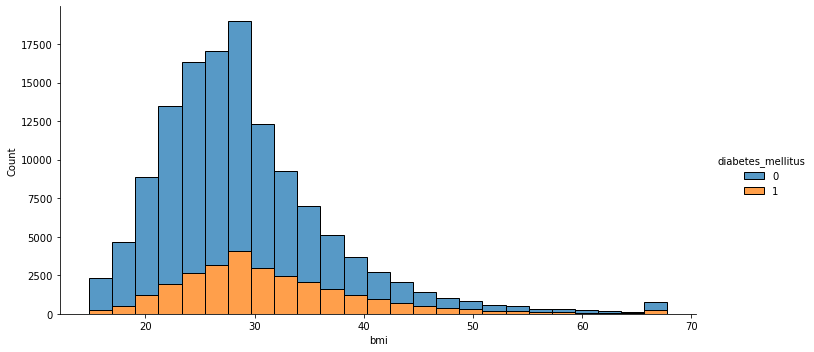

In [26]:
sns.displot(data=train, kind='hist', x ='bmi', hue ='diabetes_mellitus', multiple='stack',bins=25,aspect=2)

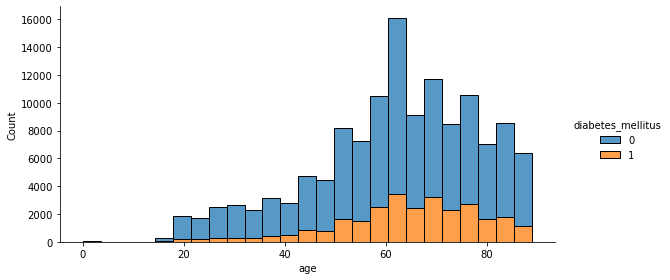

In [27]:
sns.displot(data=train, kind ='hist',x='age', hue='diabetes_mellitus', multiple='stack',bins=25,height=4,aspect=2)

In [28]:
train['gender']=train['gender'].astype('category')
test['gender']=test['gender'].astype('category')

In [29]:
x=train.drop("diabetes_mellitus" , axis=1)    
y=train.pop("diabetes_mellitus")

In [30]:
x=pd.get_dummies(x,drop_first=True)
y=pd.get_dummies(y,drop_first=True)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
model=Sequential()
model.add(Dense(81,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=["accuracy"])

In [33]:
model.fit(x,y,epochs=20,batch_size=10,verbose=1)

Epoch 1/20
13016/13016 [==============================] - 9s 646us/step - loss: 0.4475 - accuracy: 0.8007
Epoch 2/20
13016/13016 [==============================] - 8s 650us/step - loss: 0.4068 - accuracy: 0.8164
Epoch 3/20
13016/13016 [==============================] - 9s 661us/step - loss: 0.4019 - accuracy: 0.8185
Epoch 4/20
13016/13016 [==============================] - 8s 652us/step - loss: 0.3990 - accuracy: 0.8203
Epoch 5/20
13016/13016 [==============================] - 8s 653us/step - loss: 0.3967 - accuracy: 0.8212
Epoch 6/20
13016/13016 [==============================] - 9s 657us/step - loss: 0.3974 - accuracy: 0.8199
Epoch 7/20
13016/13016 [==============================] - 9s 657us/step - loss: 0.3956 - accuracy: 0.8207
Epoch 8/20
13016/13016 [==============================] - 9s 657us/step - loss: 0.3941 - accuracy: 0.8218
Epoch 9/20
13016/13016 [==============================] - 9s 660us/step - loss: 0.3907 - accuracy: 0.8230
Epoch 10/20
13016/13016 [=====================

In [34]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

4068/4068 [==============================] - 2s 397us/step - loss: 0.3784 - accuracy: 0.8277
accuracy: 82.77%


In [35]:
history=model.fit(x,y,validation_split=0.20, epochs=20,batch_size=10, verbose=2)

Epoch 1/20
10413/10413 - 7s - loss: 0.3854 - accuracy: 0.8250 - val_loss: 0.3785 - val_accuracy: 0.8294
Epoch 2/20
10413/10413 - 7s - loss: 0.3845 - accuracy: 0.8257 - val_loss: 0.3787 - val_accuracy: 0.8291
Epoch 3/20
10413/10413 - 7s - loss: 0.3841 - accuracy: 0.8257 - val_loss: 0.3729 - val_accuracy: 0.8307
Epoch 4/20
10413/10413 - 7s - loss: 0.3837 - accuracy: 0.8257 - val_loss: 0.3724 - val_accuracy: 0.8307
Epoch 5/20
10413/10413 - 7s - loss: 0.3827 - accuracy: 0.8266 - val_loss: 0.3724 - val_accuracy: 0.8318
Epoch 6/20
10413/10413 - 7s - loss: 0.3822 - accuracy: 0.8268 - val_loss: 0.3788 - val_accuracy: 0.8257
Epoch 7/20
10413/10413 - 7s - loss: 0.3821 - accuracy: 0.8273 - val_loss: 0.3781 - val_accuracy: 0.8264
Epoch 8/20
10413/10413 - 6s - loss: 0.3815 - accuracy: 0.8272 - val_loss: 0.3768 - val_accuracy: 0.8310
Epoch 9/20
10413/10413 - 6s - loss: 0.3809 - accuracy: 0.8277 - val_loss: 0.3763 - val_accuracy: 0.8290
Epoch 10/20
10413/10413 - 6s - loss: 0.3808 - accuracy: 0.8282 -

In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


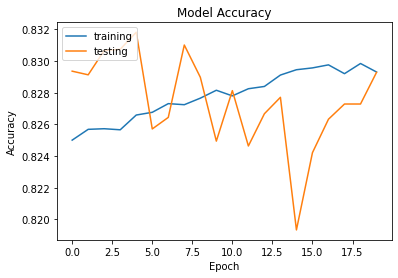

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','testing'],loc='upper left')

In [38]:
x.shape

(130157, 162)

In [39]:
x #diabetes_mellitus predicts #model can predict right 82.22%.

array([[0.76404494, 0.14891198, 0.73814009, ..., 0.        , 0.        ,
        1.        ],
       [0.86516854, 0.23743504, 0.39047782, ..., 0.        , 0.        ,
        0.        ],
       [0.28089888, 0.32297154, 0.60798082, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.82022472, 0.3288734 , 0.69532454, ..., 0.        , 0.        ,
        1.        ],
       [0.91011236, 0.18054827, 0.82548382, ..., 0.        , 0.        ,
        1.        ],
       [0.39325843, 0.28860513, 0.78266827, ..., 0.        , 0.        ,
        1.        ]])

In [40]:
unlabel=pd.read_csv("UnlabeledWiDS2021.csv")

In [41]:
unlabel=unlabel.drop(['Unnamed: 0','hospital_id', 'elective_surgery','ethnicity','hospital_admit_source'
                  ,'icu_admit_source','icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days'
                  ,'readmission_status'],axis=1)
unlabel=unlabel.drop(['h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_lactate_max'
                  ,'h1_lactate_min'], axis = 1)
unlabel=unlabel.fillna(unlabel.mean())
unlabel['gender']=unlabel['gender'].astype('category')
unlabel['age']=unlabel['age'].astype('int')

In [42]:
unlabel=pd.get_dummies(unlabel,drop_first=False)

unlabel=unlabel.set_index('encounter_id')

In [43]:
unlabel

,encounter_id,age,bmi,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,gender_F,gender_M
0,144740,72,29.116463,152.4,83.478729,2.800000,110.0,104.01,0,0,...,246.255826,0,0,0,0,0,0,0,1,0
1,141990,86,29.116463,175.3,83.478729,2.865877,117.0,106.01,0,0,...,246.255826,0,0,0,0,0,0,0,1,0
2,142038,72,29.116463,162.6,83.478729,3.200000,302.0,109.01,0,0,...,246.255826,0,0,0,0,0,0,0,1,0
3,138628,66,29.116463,177.8,83.478729,2.865877,113.0,501.05,0,0,...,246.255826,0,0,0,0,0,0,0,0,1
4,141682,89,29.116463,170.2,83.478729,3.400000,117.0,106.01,0,0,...,246.255826,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,143750,36,37.500000,170.1,108.600000,2.865877,305.0,901.02,0,0,...,246.255826,0,0,0,0,0,0,0,1,0
10230,143813,61,32.100000,160.0,82.300000,2.865877,124.0,305.02,0,0,...,246.255826,0,0,0,0,0,0,0,1,0
10231,137126,74,22.700000,165.1,62.000000,2.865877,113.0,501.06,0,0,...,246.255826,0,0,0,0,0,0,0,1,0
10232,135652,90,19.900000,160.0,50.900000,2.865877,108.0,203.01,0,0,...,246.255826,0,0,0,0,0,0,0,1,0


In [54]:
#scaler=MinMaxScaler()
#x=scaler.fit_transform(x)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
model=Sequential()
model.add(Dense(81,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=["accuracy"])

In [103]:
columns = unlabel.columns

scaler=MinMaxScaler()
ux=scaler.fit_transform(unlabel)
ux=pd.DataFrame(ux,columns=columns)

In [104]:
y_unlabel_pred=model.predict(ux)

In [105]:
model.predict_proba(ux)

array([[0.4299767 ],
       [0.42189547],
       [0.4291069 ],
       ...,
       [0.42618215],
       [0.4378798 ],
       [0.4228681 ]], dtype=float32)

In [106]:
diabetes_prediction=pd.DataFrame(model.predict_proba(ux))

In [107]:
diabetes_prediction=diabetes_prediction.rename(columns={0: 'diabetes_mellitus'})

In [108]:
diabetes_prediction

,diabetes_mellitus
0,0.429977
1,0.421895
2,0.429107
3,0.405763
4,0.397268
...,...
10229,0.423860
10230,0.413108
10231,0.426182
10232,0.437880


In [109]:
diabetes_prediction_final=pd.concat([unlabel['encounter_id'], diabetes_prediction], axis=1)
diabetes_prediction_final

,encounter_id,diabetes_mellitus
0,144740,0.429977
1,141990,0.421895
2,142038,0.429107
3,138628,0.405763
4,141682,0.397268
...,...,...
10229,143750,0.423860
10230,143813,0.413108
10231,137126,0.426182
10232,135652,0.437880


In [110]:
diabetes_prediction_final.to_csv('diabetes_prediction_final.csv', index = False)